In [ ]:
Basic statistics, maths and probability

In [ ]:
# Logistic Regression -- sigmoid curve (s-curve)

In [ ]:
Probablity -- numerical representation of likelihood of an event -- always between 0 to 1 (0 to 100%)

P = number of desired outcomes / no of possible outcomes

toss a coin -- 1/2 = 0.5

roll a dice == P(2) = 1/6
P(2) = 1/6 * 1/6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
cancer = pd.read_csv('/home/gbhure/Data/breast-cancer-wisconsin-data.csv')
cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
cancer.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [ ]:
M = Malignant
B = Benign

In [5]:
wine = pd.read_csv('/home/gbhure/Data/Wine.csv')
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,13,2,6,13,125,1,0,0.71,3,8,1,1,1004,1
1,11,6,4,10,147,3,2,0.66,4,2,2,1,681,1
2,11,4,3,13,89,2,4,0.36,2,3,1,3,946,1
3,15,6,6,11,151,4,4,0.54,5,11,1,3,319,1
4,12,2,3,13,146,0,1,0.35,2,7,1,3,1640,1


In [6]:
wine.Customer_Segment.unique()

array([1, 2, 3])

In [7]:
len(wine)

178

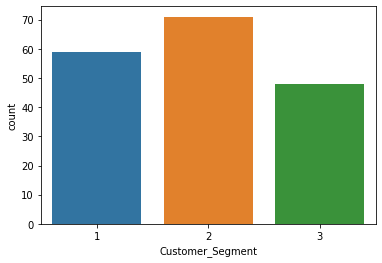

In [11]:
sns.countplot(wine.Customer_Segment)

In [12]:
wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,13,2,6,13,125,1,0,0.71,3,8,1,1,1004,1
1,11,6,4,10,147,3,2,0.66,4,2,2,1,681,1
2,11,4,3,13,89,2,4,0.36,2,3,1,3,946,1
3,15,6,6,11,151,4,4,0.54,5,11,1,3,319,1
4,12,2,3,13,146,0,1,0.35,2,7,1,3,1640,1


In [13]:
len(wine.columns)

14

In [15]:
X = wine.iloc[:, :13].values
X[:3]

array([[1.300e+01, 2.000e+00, 6.000e+00, 1.300e+01, 1.250e+02, 1.000e+00,
        0.000e+00, 7.100e-01, 3.000e+00, 8.000e+00, 1.000e+00, 1.000e+00,
        1.004e+03],
       [1.100e+01, 6.000e+00, 4.000e+00, 1.000e+01, 1.470e+02, 3.000e+00,
        2.000e+00, 6.600e-01, 4.000e+00, 2.000e+00, 2.000e+00, 1.000e+00,
        6.810e+02],
       [1.100e+01, 4.000e+00, 3.000e+00, 1.300e+01, 8.900e+01, 2.000e+00,
        4.000e+00, 3.600e-01, 2.000e+00, 3.000e+00, 1.000e+00, 3.000e+00,
        9.460e+02]])

In [19]:
y = wine.iloc[:,13].values

In [23]:
y[:100]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [25]:
logistic = LogisticRegression()

In [27]:
logistic.fit(X_train, y_train)

/home/gbhure/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/gbhure/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = logistic.predict(X_test)

In [29]:
y_pred

array([3, 2, 2, 1, 2, 1, 1, 2, 2, 3, 1, 2, 1, 3, 1, 2, 2, 3, 2, 1, 3, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3])

In [30]:
y_test

array([1, 1, 3, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1, 3, 3, 2, 1, 1, 1, 3, 3, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 3, 2, 3, 3, 1, 2])

In [31]:
accuracy_score(y_test, y_pred)

0.3055555555555556

In [32]:
confusion_matrix(y_test, y_pred)

array([[ 4, 11,  3],
       [ 3,  5,  1],
       [ 2,  5,  2]])

In [ ]:
Confusion Matrix -- to evaluate a model
to describe the performance of a classification model
actual vs predicted

Gives a quick view on how well your model is

In [34]:
len(y_test)

36

In [41]:
#pred = pd.DataFrame(y_pred)

In [48]:
pd.concat([pd.DataFrame(y_test),pred],axis=1).head()

,0,0
0,1,3
1,1,2
2,3,2
3,1,1
4,1,2


In [73]:
df = pd.read_csv('/home/gbhure/Data/titanic.csv')

In [74]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df.dropna(inplace=True)

In [75]:
emb = pd.get_dummies(df['Embarked'], drop_first=True)
sex = pd.get_dummies(df['Sex'], drop_first=True)
df = pd.concat([df, sex, emb], axis=1)
df.drop(['Sex', 'Embarked'], axis=1, inplace=True)

In [76]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [77]:
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/home/gbhure/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
y_pred = logistic.predict(X_test)
accuracy_score(y_test, y_pred) * 100

76.96629213483146

In [79]:
confusion_matrix(y_test, y_pred)

array([[87, 21],
       [20, 50]])

In [80]:
(87+50) / (87+50+20+21)

0.7696629213483146

In [86]:
y_test.values

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0])

In [87]:
y_pred

array([1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0])

In [122]:
# Decision Tree
ad = pd.read_csv('/home/gbhure/Data/Social_Network_Ads.csv')

In [123]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
Gini -- if we pick 2 points from population at random then they should from the same class.. 

In [ ]:
gini impurity = 1 - gini

gini = 1 if both points are belongs to same class
0.6, 0.7

gini impurity = 1 -0.6 = 0.4

lower the gini impurity higher homogenity of nodes.. 

entropy -- level of disturbance in the data set
measure of unpredictability of the data
entropy = 1 --> no. of YES = no of NO
entropy = 0 --> all YES in the dataset OR all NO in the dataset

In [124]:
from sklearn.tree import DecisionTreeClassifier

In [125]:
dt = DecisionTreeClassifier()

In [126]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [127]:
ad.Purchased.unique()

array([0, 1])

In [128]:
ad.Gender = ad.Gender.map({'Male': 1, 'Female': 0})

In [129]:
ad.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [131]:
X = ad.iloc[:, :3].values
y = ad.iloc[:,3].values

In [132]:
ad.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [133]:
d = dt.fit(X,y)

In [ ]:
dt.predict()